# IMPORTANT
## This code was submitted simply to show the process of developing our final code. Please run Cleaned Stock Market Predictor to see current version of code.

Installs the required python and kaggle dependencies

In [1]:
! pip install -q kaggle
! pip install numpy pandas matplotlib scikit-learn tensorflow


You will need a `kaggle.json` file to give permissions for getting data sets. Go to https://www.kaggle.com/ , create an account, go to settings -> account ->  'Create New Token'. This will trigger the download of kaggle.json, a file containing your API credentials. Upload the .json below.

The following blocks get kaggle set up and download the stock and etf dataset

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akaashmahinth","key":"cb5523873f70352d90cf52368b57e377"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                          title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance         Student Habits vs Academic Performance                    19512  2025-04-12 10:49:08.663000          24937        425  1.0              
adilshamim8/cost-of-international-education                  Cost of International Education                           18950  2025-05-07 15:41:53.213000           5346         89  1.0              
adilshamim8/social-media-addiction-vs-relationships          Students' Social Media Addiction                           7851  2025-05-10 14:38:02.713000           2789         42  1.0              
mahdimasha

In [6]:
! kaggle datasets download -d jacksoncrow/stock-market-dataset

Dataset URL: https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset
License(s): CC0-1.0
 87% 452M/522M [00:02<00:00, 76.3MB/s]
100% 522M/522M [00:03<00:00, 177MB/s] 


In [7]:
!unzip stock-market-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: stocks/CAPE.csv         
  inflating: stocks/CAPL.csv         
  inflating: stocks/CAPR.csv         
  inflating: stocks/CAR.csv          
  inflating: stocks/CARA.csv         
  inflating: stocks/CARE.csv         
  inflating: stocks/CARG.csv         
  inflating: stocks/CARO.csv         
  inflating: stocks/CARR#.csv        
  inflating: stocks/CARS.csv         
  inflating: stocks/CARV.csv         
  inflating: stocks/CASA.csv         
  inflating: stocks/CASH.csv         
  inflating: stocks/CASI.csv         
  inflating: stocks/CASS.csv         
  inflating: stocks/CASY.csv         
  inflating: stocks/CAT.csv          
  inflating: stocks/CATB.csv         
  inflating: stocks/CATC.csv         
  inflating: stocks/CATM.csv         
  inflating: stocks/CATO.csv         
  inflating: stocks/CATS.csv         
  inflating: stocks/CATY.csv         
  inflating: stocks/CB.csv           
  inflating: stocks/CBAN.csv         

# Beginning of code



In [8]:
## Imports
import numpy as np
import pandas as pd
import os
import random
import collections
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout, Bidirectional

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler


The first thing I do is get all the stocks and store all the data in a dict, this way I can index into any stock data by its ticker.
EX.`stock_data['AAPL']`

I also regularize all stocks so that the model learns price patterns rather than the prices themselves

In [9]:
stock_data = {}
for file in os.listdir('/content/stocks'):
    if file.endswith('.csv'):
        stock_name = os.path.splitext(file)[0]
        df = pd.read_csv(os.path.join('/content/stocks', file))
        stock_data[stock_name] = df



In [10]:
scaler = MinMaxScaler()
for stock in stock_data:
    stock_data[stock].loc[:, 'Open'] = scaler.fit_transform(
        stock_data[stock][['Open']]
    )

This is the meat of the models. Right now its just the bidirectional LSTM implemented. Each time you run the block a random stock is pulled from our dict, and the model is trained on the stock. Right now the model is just a little more accurate then guessing.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.4946 - loss: 0.6966 - val_accuracy: 0.5146 - val_loss: 0.6930
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5150 - loss: 0.6944 - val_accuracy: 0.4854 - val_loss: 0.6931
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5046 - loss: 0.6940 - val_accuracy: 0.4854 - val_loss: 0.6940
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4863 - loss: 0.6944 - val_accuracy: 0.5214 - val_loss: 0.6923
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5106 - loss: 0.6936 - val_accuracy: 0.5011 - val_loss: 0.6928
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4974 - loss: 0.6943 - val_accuracy: 0.5394 - val_loss: 0.6923
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5340 - loss: 0.6921 - val_accuracy: 0.4854 - val_loss: 0.7004
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4901 - loss: 0.6941 - val_accu

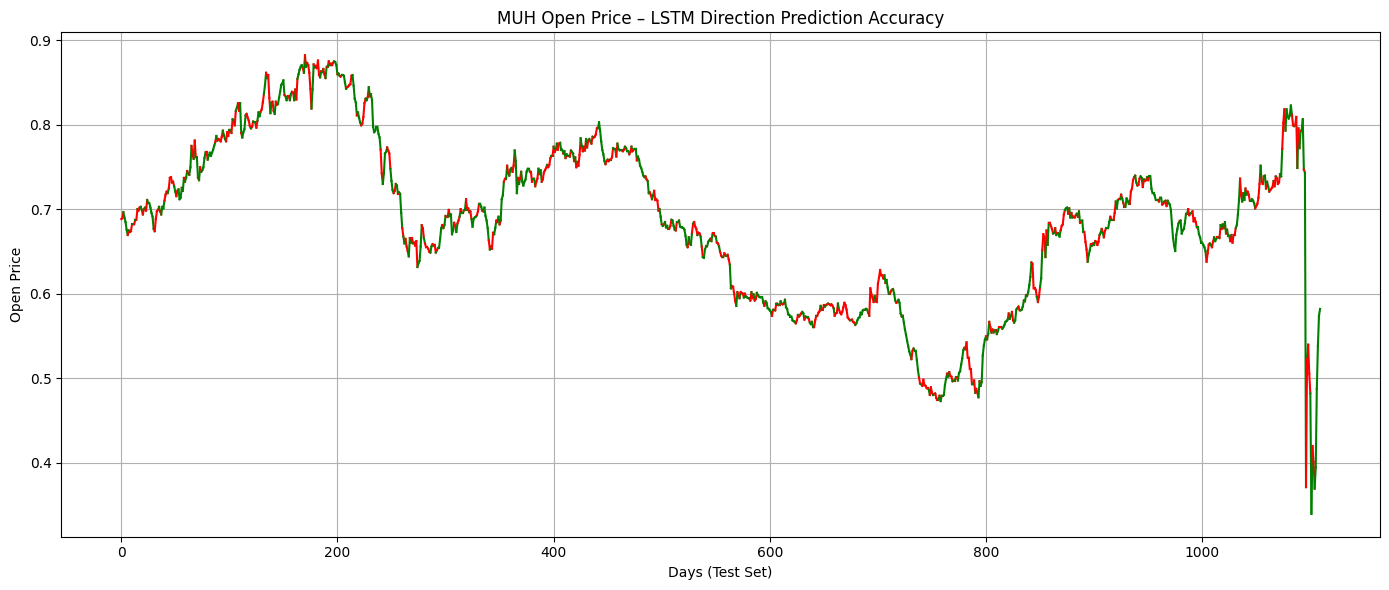

Predicted class distribution: Counter({np.int64(0): 590, np.int64(1): 520})
Actual class distribution: Counter({np.int64(0): 603, np.int64(1): 507})


In [11]:
###

# LSTM IMPLEMENTATION

###
# === 1. Prepare data ===

look_back = 10
stock_name = random.choice(list(stock_data.keys()))
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data_values = stock_data[stock_name][features].values
# Normalize the data (optional but recommended for LSTMs)
scaler = MinMaxScaler()
data_values = scaler.fit_transform(data_values)

# Create up/down labels
open_prices = stock_data[stock_name]['Open'].values
up_down_labels = (open_prices[1:] > open_prices[:-1]).astype(int)
data_values = data_values[:-1]  # match label length

# === 2. Sequence builder ===

def create_sequences(data, labels, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(labels[i + look_back - 1])  # label matches the last time step
    return np.array(X), np.array(y)

X, y = create_sequences(data_values, up_down_labels, look_back)

# === 3. Split and train ===

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # no shuffle for time series
)

num_features = data_values.shape[1]  # should be 5 in your case

model = Sequential([
    Bidirectional(LSTM(64), input_shape=(look_back, num_features)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

class_weights = class_weight.compute_class_weight(
    'balanced', classes=np.unique(y_train), y=y_train
)
cw_dict = {0: class_weights[0], 1: class_weights[1]}

model.fit(X_train, y_train, epochs=20, batch_size=16,
          validation_split=0.2, class_weight=cw_dict)
# === 4. Predict ===

pred_probs = model.predict(X_test)
preds = (pred_probs > 0.5).astype(int).flatten()

# Actual (denormalized) prices for visualization
full_prices = scaler.inverse_transform(data_values)
open_prices = full_prices[:, 0]  # Index 0 corresponds to 'Open'
plot_prices = open_prices[-len(y_test):]

# === 5. Plotting with colored segments ===

# Here the stocks actual values are plotted, where the line is green if our model
# correctly predicted the day to day direction of change (up or down from open to open)
# or red if the model incorrectly predicted the day to day direction

colors = ['green' if pred == actual else 'red' for pred, actual in zip(preds, y_test)]

print(zip(preds, y_test))

plt.figure(figsize=(14, 6))
for i in range(1, len(plot_prices)):
    plt.plot(
        [i - 1, i],
        [plot_prices[i - 1], plot_prices[i]],
        color=colors[i]
    )

plt.title(f"{stock_name} Open Price – LSTM Direction Prediction Accuracy")
plt.xlabel("Days (Test Set)")
plt.ylabel("Open Price")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Predicted class distribution:", collections.Counter(preds))
print("Actual class distribution:", collections.Counter(y_test))


Epoch 1 - Loss: nan
Epoch 2 - Loss: nan
Epoch 3 - Loss: nan
Epoch 4 - Loss: nan
Epoch 5 - Loss: nan
Epoch 6 - Loss: nan
Epoch 7 - Loss: nan
Epoch 8 - Loss: nan
Epoch 9 - Loss: nan
Epoch 10 - Loss: nan


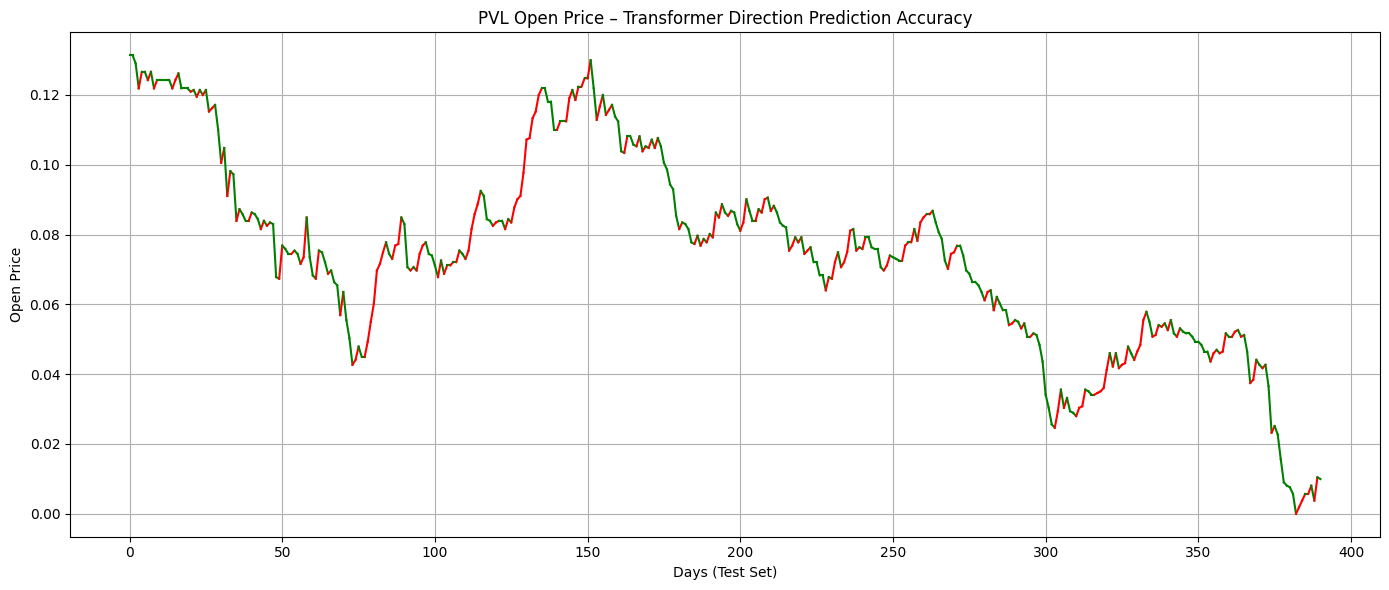

Predicted class distribution: Counter({np.int64(0): 391})
Actual class distribution: Counter({np.int64(0): 228, np.int64(1): 163})


In [12]:
# === 1. Prepare data ===

look_back = 160
patch_size = 16  # Try values like 16, 32
stock_name = random.choice(list(stock_data.keys()))
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data_values = stock_data[stock_name][features].values

scaler = MinMaxScaler()
data_values = scaler.fit_transform(data_values)

open_prices = stock_data[stock_name]['Open'].values
up_down_labels = (open_prices[1:] > open_prices[:-1]).astype(int)
data_values = data_values[:-1]

def create_sequences(data, labels, look_back, patch_size):
    if look_back % patch_size != 0:
        raise ValueError(f"look_back ({look_back}) must be divisible by patch_size ({patch_size})")
    X, y = [], []
    for i in range(len(data) - look_back):
        seq = data[i:i + look_back]
        label = labels[i + look_back - 1]
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)


X, y = create_sequences(data_values, up_down_labels, look_back, patch_size)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32)

# === 2. Patch Transformer Model ===

class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, patch_size, seq_len, d_model=64, nhead=4, num_layers=2, dropout=0.1):
        super().__init__()
        self.patch_size = patch_size
        self.num_patches = seq_len // patch_size
        self.d_model = d_model

        self.patch_embed = nn.Linear(patch_size * input_dim, d_model)
        self.pos_embed = nn.Parameter(torch.randn(1, self.num_patches, d_model))

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.classifier = nn.Sequential(
            nn.LayerNorm(d_model),
            nn.Linear(d_model, 1)
        )

    def forward(self, x):
        B, T, C = x.shape
        x = x.view(B, self.num_patches, self.patch_size * C)
        x = self.patch_embed(x) + self.pos_embed
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling
        return self.classifier(x).squeeze()

# === 3. Training ===

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TimeSeriesTransformer(
    input_dim=X.shape[2],
    patch_size=patch_size,
    seq_len=look_back
).to(device)

pos_weight = torch.tensor([sum(y_train==0) / sum(y_train==1)], device=device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(10):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} - Loss: {total_loss:.4f}")

# === 4. Evaluation ===

model.eval()
all_preds = []
with torch.no_grad():
    for xb, _ in test_loader:
        xb = xb.to(device)
        preds = torch.sigmoid(model(xb).cpu())
        all_preds.extend(preds)

preds_bin = (np.array(all_preds) > 0.5).astype(int)

# === 5. Visualization ===

full_prices = scaler.inverse_transform(data_values)
plot_prices = full_prices[-len(y_test):, 0]

colors = ['green' if pred == actual else 'red' for pred, actual in zip(preds_bin, y_test)]

plt.figure(figsize=(14, 6))
for i in range(1, len(plot_prices)):
    plt.plot([i - 1, i], [plot_prices[i - 1], plot_prices[i]], color=colors[i])
plt.title(f"{stock_name} Open Price – Transformer Direction Prediction Accuracy")
plt.xlabel("Days (Test Set)")
plt.ylabel("Open Price")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Predicted class distribution:", collections.Counter(preds_bin))
print("Actual class distribution:", collections.Counter(y_test))

Epoch 1 - Loss: 2.6306
Epoch 2 - Loss: 1.3510
Epoch 3 - Loss: 1.1733
Epoch 4 - Loss: 0.8457
Epoch 5 - Loss: 0.6589
Epoch 6 - Loss: 0.4370
Epoch 7 - Loss: 0.3634
Epoch 8 - Loss: 0.2920
Epoch 9 - Loss: 0.2521
Epoch 10 - Loss: 0.2176
Epoch 11 - Loss: 0.1623
Epoch 12 - Loss: 0.1740
Epoch 13 - Loss: 0.1369
Epoch 14 - Loss: 0.1769
Epoch 15 - Loss: 0.1208
Epoch 16 - Loss: 0.1245
Epoch 17 - Loss: 0.1140
Epoch 18 - Loss: 0.1099
Epoch 19 - Loss: 0.1056
Epoch 20 - Loss: 0.1229


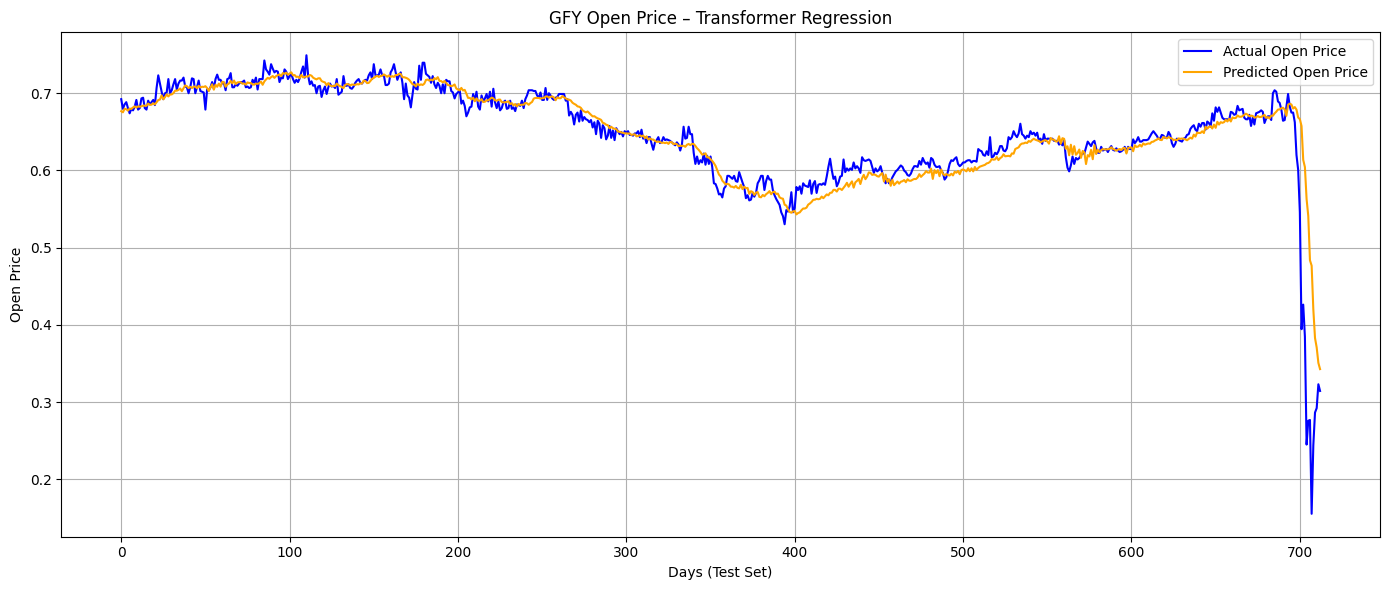

Test RMSE: 0.0301


In [13]:
# === 1. Prepare data ===

look_back = 320
patch_size = 16
epochs = 20
stock_name = random.choice(list(stock_data.keys()))
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data_values = stock_data[stock_name][features].values

scaler = MinMaxScaler()
data_values = scaler.fit_transform(data_values)

# Target: next day's *normalized* Open price
open_prices = data_values[:, 0]  # Normalized open prices
targets = open_prices[look_back:]  # Target is the open price after the window
data_values = data_values[:-1]  # match sequence to target length

def create_sequences(data, labels, look_back, patch_size):
    if look_back % patch_size != 0:
        raise ValueError(f"look_back ({look_back}) must be divisible by patch_size ({patch_size})")
    X, y = [], []
    for i in range(len(data) - look_back):
        seq = data[i:i + look_back]
        label = labels[i]
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)

X, y = create_sequences(data_values, targets, look_back, patch_size)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32)

# === 2. Patch Transformer Model for Regression ===

class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, patch_size, seq_len, d_model=64, nhead=4, num_layers=2, dropout=0.1):
        super().__init__()
        self.patch_size = patch_size
        self.num_patches = seq_len // patch_size
        self.d_model = d_model

        self.patch_embed = nn.Linear(patch_size * input_dim, d_model)
        self.pos_embed = nn.Parameter(torch.randn(1, self.num_patches, d_model))

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.regressor = nn.Sequential(
            nn.LayerNorm(d_model),
            nn.Linear(d_model, 1)
        )

    def forward(self, x):
        B, T, C = x.shape
        x = x.view(B, self.num_patches, self.patch_size * C)
        x = self.patch_embed(x) + self.pos_embed
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling
        return self.regressor(x).squeeze()

# === 3. Training ===

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TimeSeriesTransformer(
    input_dim=X.shape[2],
    patch_size=patch_size,
    seq_len=look_back
).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} - Loss: {total_loss:.4f}")

# === 4. Evaluation ===

model.eval()
all_preds = []
with torch.no_grad():
    for xb, _ in test_loader:
        xb = xb.to(device)
        preds = model(xb).cpu().numpy()
        all_preds.extend(preds)

all_preds = np.array(all_preds).reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

# Inverse transform predicted and actual values
dummy_data = np.zeros((len(all_preds), data_values.shape[1]))
dummy_data[:, 0] = all_preds[:, 0]
denorm_preds = scaler.inverse_transform(dummy_data)[:, 0]

dummy_data[:, 0] = y_test_reshaped[:, 0]
denorm_actuals = scaler.inverse_transform(dummy_data)[:, 0]

# === 5. Plotting ===

plt.figure(figsize=(14, 6))
plt.plot(denorm_actuals, label='Actual Open Price', color='blue')
plt.plot(denorm_preds, label='Predicted Open Price', color='orange')
plt.title(f"{stock_name} Open Price – Transformer Regression")
plt.xlabel("Days (Test Set)")
plt.ylabel("Open Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Show RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(denorm_actuals, denorm_preds))
print(f"Test RMSE: {rmse:.4f}")


# Below code is iteration 1. Dont worry about this stuff.



Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


396/396 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 4.5837e-04 - val_loss: 5.2048e-04
Epoch 2/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 5.9701e-07 - val_loss: 9.6352e-06
Epoch 3/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.3473e-07 - val_loss: 1.0126e-05
Epoch 4/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.0303e-07 - val_loss: 9.7965e-06
Epoch 5/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.2498e-07 - val_loss: 9.6121e-06
Epoch 6/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.3754e-07 - val_loss: 9.2588e-06
Epoch 7/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.5180e-07 - val_loss: 9.6924e-06
Epoch 8/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.7162e-07 - val_loss: 1.2743e-05
Epoch 9/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.0559e-07 - val_loss: 9.0959e-06
Epoch 10/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.7781e-07 - val_loss: 9.1572e-06
Epoch 11/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 3.2305e

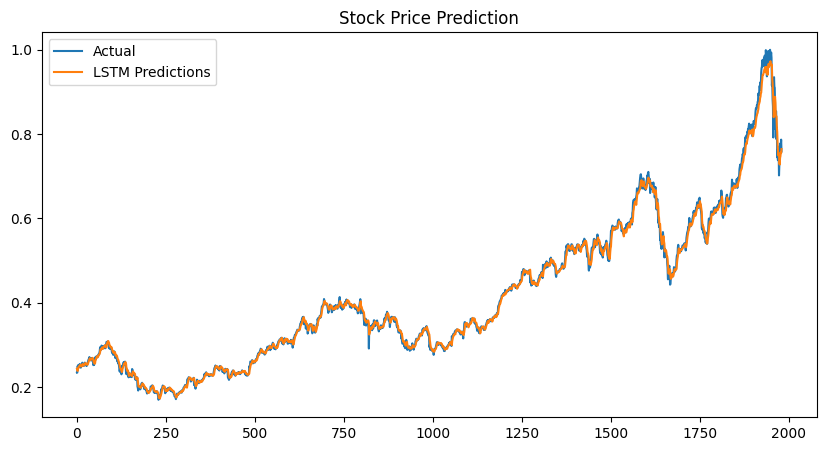

In [14]:


## Data Collection (Placeholder)
# Load stock price data (e.g., from Yahoo Finance)
# Load political trade data (e.g., from OpenSecrets or simulated data)
# For now, generate sample data

our_data = stock_data['AAPL']
# dates = pd.date_range(start='2020-01-01', periods=100)
# stock_prices = np.sin(np.linspace(0, 10, 100)) + np.random.normal(scale=0.1, size=100)
political_trades = np.random.choice([0, 1], size=len(our_data['Open']), p=[0.9, 0.1])

data = pd.DataFrame({
    'Date': our_data['Date'],
    'Stock_Price': our_data['Open'],
    'Political_Trade': political_trades
})

## Preprocessing
# Normalize data
scaler = MinMaxScaler()
data[['Stock_Price', 'Political_Trade']] = scaler.fit_transform(data[['Stock_Price', 'Political_Trade']])

# Create sequences for LSTM
def create_sequences(data, look_back=5):
    X, y = [], []
    for i in range(len(data) - look_back):
        seq = data[i:(i + look_back), :]
        X.append(seq)
        y.append(data[i + look_back, 0])  # Stock Price as target
    return np.array(X), np.array(y)

look_back = 10
data_values = data[['Stock_Price', 'Political_Trade']].values
X, y = create_sequences(data_values, look_back=look_back)

# Split into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## LSTM Model
lstm_model = Sequential([
    LSTM(50, input_shape=(look_back, 2), return_sequences=False),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_split=0.2)

## Evaluation
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    return predictions, mse, mae

# LSTM
lstm_predictions, lstm_mse, lstm_mae = evaluate_model(lstm_model, X_test, y_test)

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, label="Actual")
plt.plot(range(len(lstm_predictions)), lstm_predictions, label="LSTM Predictions")
plt.legend()
plt.title("Stock Price Prediction")
plt.show()
